In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Plot Functions

In [2]:
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .23
plt_width = 38
plt_heigth = 18
plot_rotation = 75
axis_font_size = 50
labels_size = 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['Dataset'], as_index=False )['MAE'].rank(method='average', ascending = True)

    order = sample.groupby('Method')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['Method'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width,plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='Method', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    if file != "":
        ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

# Plotting results

## Plotting Quantification Results

In [3]:
mae = pd.read_csv('./experiment_tables/even_more_summarized/experiment_table_WITH_BASELINE.csv')

query_og = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'MS2', 'PACC', 'PCC', 'SMM', 'SORD', 'TOP1', 'TOP3+MEAN', 'TOP3+MEDIAN', 'TOP3+WEIGHTED', 'TOP5+MEAN', 'TOP5+MEDIAN', 'TOP5+WEIGHTED', 'TOPLINE', 'X']"
query = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'TOP1', 'TOP3+MEAN', 'TOP3+WEIGHTED', 'TOP5+MEAN', 'TOP5+WEIGHTED', 'TOP3+MEAN+BASELINE', 'TOP3+WEIGHTED+BASELINE', 'TOP5+MEAN+BASELINE', 'TOP5+WEIGHTED+BASELINE', 'X']"

mae_select = mae.query(query_og)

In [4]:
# prompt: from mae data frame replace the names of of the column Method

#mae_select.replace({
#    "Random Forests+Top1": "Top-1",
#    "Random Forests+Top3 (MEDIAN)": "Top-3",
#    "Random Forests+Top5 (MEDIAN)": "Top-5",
#    "Random Forests+Top3+Weighted (ENSEMBLE)": "Top-3+W",
#    "Random Forests+Top5+Weighted (ENSEMBLE)": "Top-5+W",
#    "SVM+Top1": "SVM (k=1)",
#    "SVM+Top3 (MEDIAN)": "SVM (k=3)",
#    "SVM+Top5 (MEDIAN)": "SVM (k=5",
#    "SVM+Top3+Weighted (ENSEMBLE)": "SVM+Weighted (k=3)",
#    "SVM+Top5+Weighted (ENSEMBLE)": "SVM+Weighted (k=5)",
#    "XGBOOST+Top1": "XGBoost (k=1)",
#    "XGBOOST+Top3 (MEDIAN)": "XGBoost (k=3)",
#    "XGBOOST+Top5 (MEDIAN)": "XGBoost (k=5)",
#    "XGBOOST+Top3+Weighted (ENSEMBLE)": "XGBoost+Weighted (k=3)",
#    "XGBOOST+Top5+Weighted (ENSEMBLE)": "XGBoost+Weighted (k=5)",
#}, inplace=True)



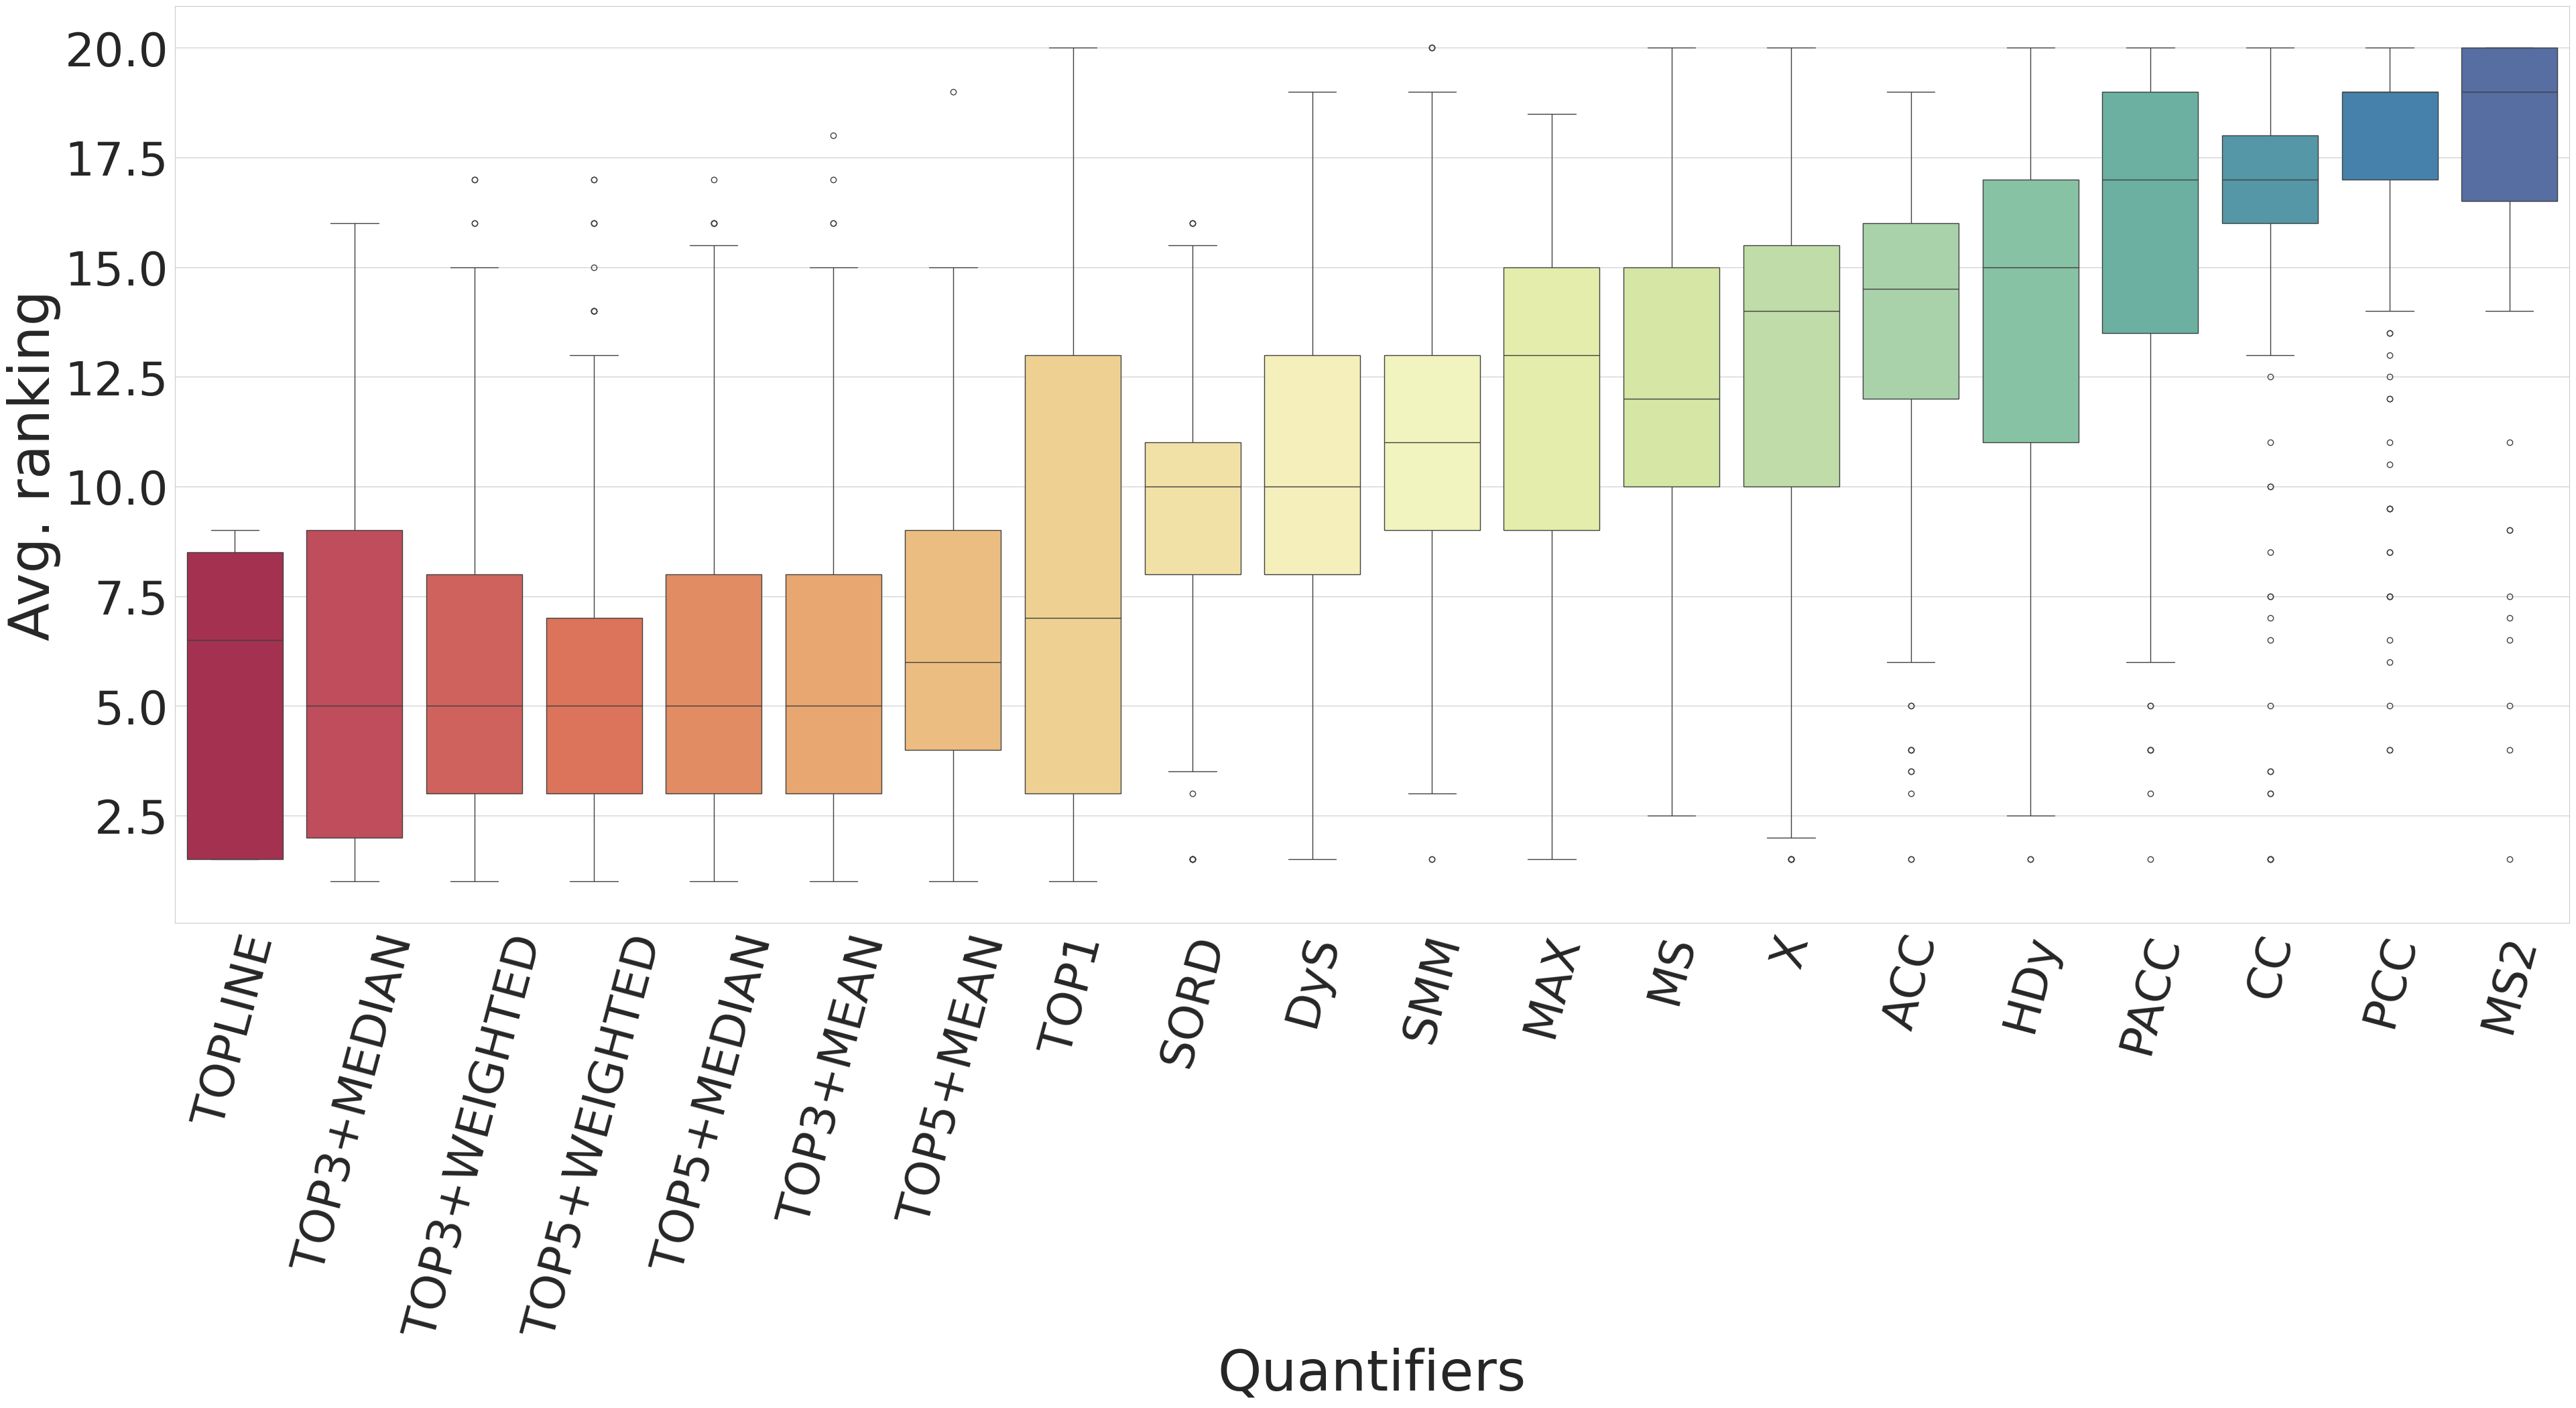

In [5]:
x= boxplotMae(mae_select.query(query_og), 'boxall')

In [ ]:
# prompt: Group the x dataframe by Method averaging the error_rank column

x_grouped = x.groupby('Method')['error_rank'].mean().reset_index()
round(x_grouped,2)


In [ ]:
# prompt: Group the x dataframe by Method standard deviation the error_rank column

x_grouped_std = x.groupby('Method')['error_rank'].std().reset_index()
round(x_grouped_std,2)


In [ ]:
x

In [ ]:
aux = pd.DataFrame(x[x['Method'] == "Top-3"]['error_rank'].value_counts()).reset_index()
aux.columns = ['error_rank', 'count']
aux[aux.error_rank < 2]['count'].sum()

In [ ]:
# prompt: Consider the dataframe x composed by columns Method, Dataset, and MAE. Write a code that for each value in Method column count how many time it produce the lowest MAE for each valeu in Dataset column

import pandas as pd
def count_lowest_mae(df):
  """
  For each value in the "Method" column, count how many times it produces the lowest MAE for each value in the "Dataset" column.

  Args:
      df (pd.DataFrame): DataFrame containing columns "Method", "Dataset", and "MAE".

  Returns:
      dict: A dictionary where the keys are the methods and the values are the number of times each method produced the lowest MAE for each dataset.
  """

  lowest_mae_counts = {}
  for method in df["Method"].unique():
    lowest_mae_counts[method] = 0
    for dataset in df["Dataset"].unique():
      lowest_mae = df.loc[df["Dataset"] == dataset, "MAE"].min()
      if df.loc[(df["Dataset"] == dataset) & (df["MAE"] == lowest_mae), "Method"].iloc[0] == method:
        lowest_mae_counts[method] += 1

  return lowest_mae_counts

# Example usage
#df = pd.DataFrame({"Method": ["A", "B", "C", "A", "B", "C"], "Dataset": ["X", "X", "X", "Y", "Y", "Y"], "MAE": [10, 12, 15, 8, 11, 9]})
count_lowest_mae(x.groupby(['Method', 'Dataset'])['MAE'].mean().reset_index()))



In [ ]:
# prompt: Consider the dataframe x composed by columns Method, Dataset, and MAE. Write a code that for each value in Method column count how many time it produce the lowest MAE for each valeu in Dataset column. Present the result in a dataframe

import pandas as pd
# Create a new column that identifies the minimum MAE for each dataset
x['min_MAE'] = x.groupby('Dataset')['MAE'].transform('min')

# Create a new column that indicates whether the MAE for each row is the minimum for that dataset
x['is_min_MAE'] = x['MAE'] == x['min_MAE']

# Group the data by Method and count the number of times each method produces the minimum MAE for each dataset
results = x.groupby(['Method', 'Dataset'])['is_min_MAE'].sum().unstack()

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
results_df

In [ ]:
x[x['Dataset']== '1056_mc1']

In [ ]:
# prompt: sum the lines of the dataframe results_df

results_sum = results_df.sum(axis=1)
pd.DataFrame(results_sum)


In [ ]:
x.groupby(['Method', 'Dataset'])['MAE'].mean().reset_index()

In [ ]:
x[x['Method'] == "SORD"]['error_rank'].mean()

In [ ]:
len(x['Dataset'].unique())

## Preparing to CD plot

In [ ]:
pivoted_df = x.pivot_table(values='MAE', index='Dataset', columns='Method')
pivoted_df


pivoted_df.reset_index().to_csv('/content/drive/MyDrive/lequa24_workshop/results_CD_plot.csv', index=False)

In [ ]:
mae.query('Method in ["Topline","DyS", "CC", "SMM", "MS", "HDy", "X", "SORD", "PACC", "PCC", "ACC", "MAX","Random Forests+Top1", "Random Forests+Top3 (MEDIAN)", "Random Forests+Top5 (MEDIAN)","Random Forests+Top3+Weighted (ENSEMBLE)","Random Forests+Top5+Weighted (ENSEMBLE)","XGBOOST+Top1", "XGBOOST+Top3 (MEDIAN)", "XGBOOST+Top5 (MEDIAN)", "XGBOOST+Top3+Weighted (ENSEMBLE)","XGBOOST+Top5+Weighted (ENSEMBLE)","SVM+Top1", "SVM+Top3 (MEDIAN)", "SVM+Top5 (MEDIAN)", "SVM+Top3+Weighted (ENSEMBLE)","SVM+Top5+Weighted (ENSEMBLE)"]')

# Datasets with high accuracy and F1

In [ ]:
easy_dts = ["1121_badges2.csv","1566_hill-valley.csv","377_synthetic_control.csv","61_iris.csv","1069_pc2.csv","18_mfeat-morphological.csv","36_segment.csv","1056_mc1.csv","1462_banknote-authentication.csv","316_yeast_ml8.csv","ArabicDigit.csv","occupancy.csv","312_scene.csv","461_analcatdata_creditscore.csv","HTRU.csv","winetype.csv","14_mfeat-fourier.csv","458_analcatdata_authorship.csv","1507_twonorm.csv","AedesSex.csv","1535_volcanoes-b5.csv","1570_wilt.csv","182_satimage.csv","BNG.csv","1539_volcanoes-d2.csv","1071_mw1.csv","1538_volcanoes-d1.csv","1540_volcanoes-d3.csv","1541_volcanoes-d4.csv","1487_ozone-level-8hr.csv"]

In [ ]:
aux2 = aux[aux["Dataset"].isin(['1484_lsvt.csv', '1465_breast-tissue.csv', '1056_mc1.csv', '329_hayes-roth.csv', '48_tae.csv', '1460_banana.csv','37_diabetes.csv', '311_oil_spill.csv', '44_spambase.csv', ])]
aux2 = aux2[aux['quantifier'].isin([ "SORD", "DyS", "ACC", "MS"])]

#'1054_mc2.csv','37_diabetes.csv', '311_oil_spill.csv', '44_spambase.csv',

In [ ]:
# prompt: From the aux2 dataset rename the values in column Dataset '1054_mc2.csv','37_diabetes.csv', '311_oil_spill.csv', '44_spambase.csv', '1484_lsvt.csv', '1465_breast-tissue.csv', '1056_mc1.csv', '329_hayes-roth.csv', '48_tae.csv' to sequence name like A, B, C, and so forth

aux2 = aux2.replace({

    '37_diabetes.csv': 'A',
    '311_oil_spill.csv': 'B',
    '1460_banana.csv': 'C',
    '44_spambase.csv': 'D',
    '1484_lsvt.csv': 'E',
    '1465_breast-tissue.csv': 'F',
    '1056_mc1.csv': 'G',
    '329_hayes-roth.csv': 'H',
    '48_tae.csv': 'I'
})


In [ ]:
# prompt: From the plot above, Remove the border of the legend and site it at bottom. Remove the grid of the legend. Increase the font size bigger. Increase the radial label font size

import matplotlib.pyplot as plt
import numpy as np
# prompt: From the plot above, Remove the border of the legend and site it at bottom. Remove the grid of the legend. Increase the font size bigger. Increase the radial label font size


from matplotlib.patches import Polygon
# Create a new dataframe with the relevant data
df = aux2.pivot_table(values='MAE', index='quantifier', columns='Dataset')

# Create a radial plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Set the labels for the spokes
labels = df.columns.tolist()
ax.set_xticklabels(labels)

# Set the limits for the plot
ax.set_rlim(0, df.values.max())

# Define the colors for each quantifier
colors = {
    "SORD": "brown",
    "DyS": "blue",
    "ACC": "green",
    "MS": "orange",
}

# Plot the data
for i, row in df.iterrows():
    values = row.values
    angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)
    ax.plot(angles, values, color=colors[i], linewidth=3)

    # Create a filled polygon for each quantifier
    polygon = Polygon(np.column_stack((angles, values)), color=colors[i], alpha=0.3)
    ax.add_patch(polygon)

# Add a legend
legend_elements = []
for i in colors:
    legend_elements.append(
        plt.Line2D([0], [0], marker="o", color=colors[i], label=i)
    )
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, borderaxespad=0, frameon=False, fontsize=16)

# Set the title
#ax.set_title('Radial Plot of Quantifier Errors by Dataset', fontsize=16)

# Increase the radial label font size
ax.tick_params(axis='x', labelsize=16)

# Remove the grid of the legend
ax.get_legend().get_frame().set_linewidth(0.0)

# Show the plot
plt.show()


In [ ]:
# prompt: Considering the exp_table data frame and the column Method with the method name and the column MAE with the error, convert it into data frame where each method is a column and the rows represents their respective errors

pivoted_df = exp_table.pivot_table(values='MAE', index='Dataset', columns='Method')
print(pivoted_df)


In [ ]:
pivoted_df.reset_index().to_csv('/content/drive/MyDrive/lequa24_workshop/results_all.csv', index=False)